<a href="https://colab.research.google.com/github/PranavSarvaiyya/Chatify.AI/blob/main/Code_Implementation__ClassificationModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


Analyze dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.shape

(400, 5)

In [6]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


<Axes: >

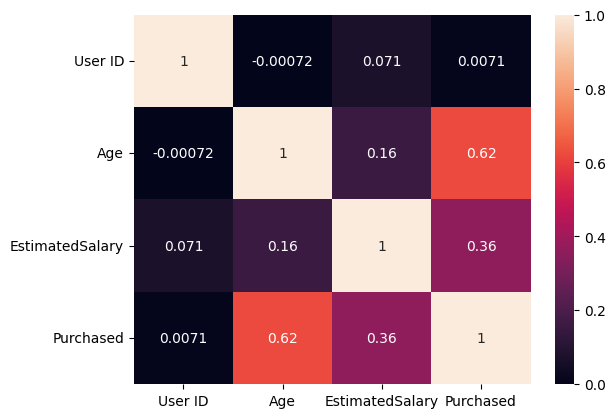

In [7]:
sns.heatmap(df.corr(numeric_only = True), annot = True)

In [8]:
df["Purchased"].value_counts()

,count
Purchased,
0,257
1,143


In [9]:
df["Gender"].value_counts()

,count
Gender,
Female,204
Male,196


In [10]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [11]:
df.drop(["User ID"],axis = 1, inplace= True)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


Preprocessing Dataset

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [14]:
X = df.drop(["Purchased"], axis = 1)
Y = df["Purchased"]


In [15]:
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [16]:
Y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


Train and test it and Build a model

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.20,random_state=42)
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [18]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [19]:
y_test

,Purchased
209,0
280,1
33,0
210,1
93,0
...,...
246,0
227,1
369,1
176,0


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,y_pred)

0.8875

In [21]:
confusion_matrix(y_test,y_pred)

array([[50,  2],
       [ 7, 21]])

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



Now we Used KNN Algorithm

In [37]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled

array([[-1.        , -1.06675246, -0.38634438],
       [ 1.        ,  0.79753468, -1.22993871],
       [-1.        ,  0.11069205,  1.853544  ],
       [-1.        ,  0.60129393, -0.90995465],
       [-1.        ,  1.87685881, -1.28811763],
       [ 1.        , -0.57615058,  1.44629156],
       [ 1.        ,  0.3069328 , -0.53179168],
       [ 1.        ,  0.99377543,  0.10817643],
       [ 1.        , -1.16487283,  0.45724994],
       [ 1.        , -1.55735433,  0.31180264],
       [ 1.        ,  1.0918958 ,  0.45724994],
       [-1.        , -0.18366908, -0.47361276],
       [ 1.        ,  0.20881242, -0.32816546],
       [-1.        ,  0.3069328 ,  0.28271318],
       [ 1.        , -1.16487283, -1.57901222],
       [-1.        ,  0.11069205,  0.25362372],
       [ 1.        ,  2.07309956,  1.73718616],
       [ 1.        ,  0.40505317, -0.18271817],
       [-1.        ,  1.4843773 ,  2.11534913],
       [ 1.        , -0.37990983,  1.21357589],
       [-1.        ,  1.87685881,  1.504

In [38]:
x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled

array([[-0.90453403,  0.80285749, -1.39649711],
       [-0.90453403,  1.93579072,  0.62530293],
       [-0.90453403, -0.76581929, -0.72256376],
       [-0.90453403,  0.97715491,  0.8703696 ],
       [-0.90453403, -0.67867058, -1.21269711],
       [-0.90453403, -0.59152187, -0.17116375],
       [-0.90453403,  0.8900062 ,  1.20733627],
       [-0.90453403, -0.67867058,  0.47213626],
       [ 1.1055416 ,  0.27996523,  0.22706959],
       [ 1.1055416 ,  0.45426265, -0.07926375],
       [-0.90453403, -0.15577832, -0.07926375],
       [-0.90453403,  1.41289846, -1.0288971 ],
       [-0.90453403, -1.20156284, -0.60003043],
       [-0.90453403, -1.46300897, -1.36586378],
       [ 1.1055416 , -0.59152187,  0.5946696 ],
       [ 1.1055416 , -0.15577832,  1.23796961],
       [-0.90453403,  1.32574975, -0.90636377],
       [-0.90453403,  0.80285749,  0.19643625],
       [ 1.1055416 ,  0.19281652, -0.78383043],
       [ 1.1055416 ,  1.67434459, -0.23243042],
       [-0.90453403, -1.28871155, -1.243

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 25)
knn_model = knn.fit(x_train_scaled, y_train)
knn_model

KNeighborsClassifier(n_neighbors=25)

In [40]:
Y_pred = knn_model.predict(x_test_scaled)
Y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

Now doing Knn Model Evaluation

In [27]:
accuracy_score(y_test,Y_pred)

0.8625

In [28]:
confusion_matrix(y_test,Y_pred)

array([[48,  4],
       [ 7, 21]])

In [29]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90        52
           1       0.84      0.75      0.79        28

    accuracy                           0.86        80
   macro avg       0.86      0.84      0.84        80
weighted avg       0.86      0.86      0.86        80



Now making Naive Bayes Algorithm

In [30]:
from sklearn.naive_bayes import GaussianNB
model_nb  = GaussianNB()
model_nb.fit(x_train,y_train)

GaussianNB()

In [31]:
y_pred_nb = model_nb.predict(x_test)
y_pred_nb

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [33]:
accuracy_score(y_test,y_pred_nb)

0.9375

In [34]:
confusion_matrix(y_test,y_pred_nb)

array([[50,  2],
       [ 3, 25]])

In [35]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



Now, Decision Tree Algorithm

In [46]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [47]:
y_pred_dt = model_dt.predict(x_test_scaled)
y_pred_dt

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [48]:
accuracy_score(y_test,y_pred_dt)

0.8125

In [49]:
confusion_matrix(y_test,y_pred_dt)

array([[43,  9],
       [ 6, 22]])

In [50]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        52
           1       0.71      0.79      0.75        28

    accuracy                           0.81        80
   macro avg       0.79      0.81      0.80        80
weighted avg       0.82      0.81      0.81        80



Now, Support Vector Machine Algorithm

In [51]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(x_train_scaled,y_train)

SVC()

In [52]:
y_pred_svm = model_svm.predict(x_test_scaled)
y_pred_svm

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [54]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        52
           1       0.84      0.96      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



In [55]:
accuracy_score(y_test,y_pred_svm)

0.925

In [56]:
confusion_matrix(y_test,y_pred_svm)

array([[47,  5],
       [ 1, 27]])

# **CONCLUSION-From 5 models are given higher accuracy which is Naive Bayes and Support Vector Machine**